In [1]:
import os
import sys
sys.path.append('../')

from utils.dataset import get_dataloaders
from utils.model import get_siamese_model
from utils.plots import plot_confusion
from utils.test import eval_model_inference
from utils.utility import get_support_set, load_model

import mlx.core as mx
mx.random.seed(92)
mx.set_default_device(mx.gpu)

# Setup

In [2]:
# Define Paths
data_path = os.getcwd() + '/../../data'
train_path = f'{data_path}/train/'
test_path = f'{data_path}/test/'
val_path = f'{data_path}/val/'
data_paths = [train_path, test_path, val_path]
data_labels = ['train', 'test', 'val']

# Get Test Dataloader and Support Sets for varying k
k = 1
batch_size = 1
margin = 1
transform_type = 'none'
train_loader, test_loader, val_loader = get_dataloaders(data_paths, data_labels, transform_type, k, batch_size)
support_set_1, support_classes_1 = get_support_set(train_loader, test_loader, val_loader, 1)
support_set_2, support_classes_2 = get_support_set(train_loader, test_loader, val_loader, 2)
support_set_5, support_classes_5 = get_support_set(train_loader, test_loader, val_loader, 5)
support_set_10, support_classes_10 = get_support_set(train_loader, test_loader, val_loader, 10)

# Test Model 1  
Base Siamese Network

In [3]:
# Load Model
model = get_siamese_model(1)
model_path = '../models/1'
model = load_model(model, model_path)

Weights Path: ../models/1/14.npz
Number of parameters: 329376129
<bound method Module.parameters of SiameseNetwork1(
  (cnn): Sequential(
    (layers.0): Conv2d(3, 64, kernel_size=(5,), stride=(1, 1), padding=(2, 2), bias=True)
    (layers.1): ReLU()
    (layers.2): BatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
    (layers.4): Conv2d(64, 128, kernel_size=(5,), stride=(1, 1), padding=(2, 2), bias=True)
    (layers.5): ReLU()
    (layers.6): BatchNorm(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
    (layers.8): Conv2d(128, 256, kernel_size=(3,), stride=(1, 1), padding=(1, 1), bias=True)
    (layers.9): ReLU()
    (layers.10): BatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
 

In [4]:
# Test Model: 29-Ways K-Shots
acc1, inference1, cm1, cm_labels1  = eval_model_inference(model, test_loader, support_set_1, support_classes_1, margin, 1)
acc2, inference2, cm2, cm_labels2  = eval_model_inference(model, test_loader, support_set_2, support_classes_2, margin, 2)
acc5, inference5, cm5, cm_labels5  = eval_model_inference(model, test_loader, support_set_5, support_classes_5, margin, 5)
acc10, inference10, cm10, cm_labels10 = eval_model_inference(model, test_loader, support_set_10, support_classes_10, margin, 10)

Testing Model | K = 1: : 18000it [11:13, 26.75it/s, Correct=1, Inference Time=0.033064 seconds]


K = 1 | Accuracy: 47.53% | Average Inference Time: 0.036157 seconds | Average Inference Speed: 27.66 images/second


Testing Model | K = 2: : 18000it [11:10, 26.86it/s, Correct=1, Inference Time=0.033072 seconds]


K = 2 | Accuracy: 51.36% | Average Inference Time: 0.036068 seconds | Average Inference Speed: 27.73 images/second


Testing Model | K = 5: : 18000it [10:43, 27.99it/s, Correct=1, Inference Time=0.037626 seconds]


K = 5 | Accuracy: 55.25% | Average Inference Time: 0.034395 seconds | Average Inference Speed: 29.07 images/second


Testing Model | K = 10: : 18000it [11:30, 26.07it/s, Correct=1, Inference Time=0.037446 seconds]


K = 10 | Accuracy: 64.81% | Average Inference Time: 0.036817 seconds | Average Inference Speed: 27.16 images/second


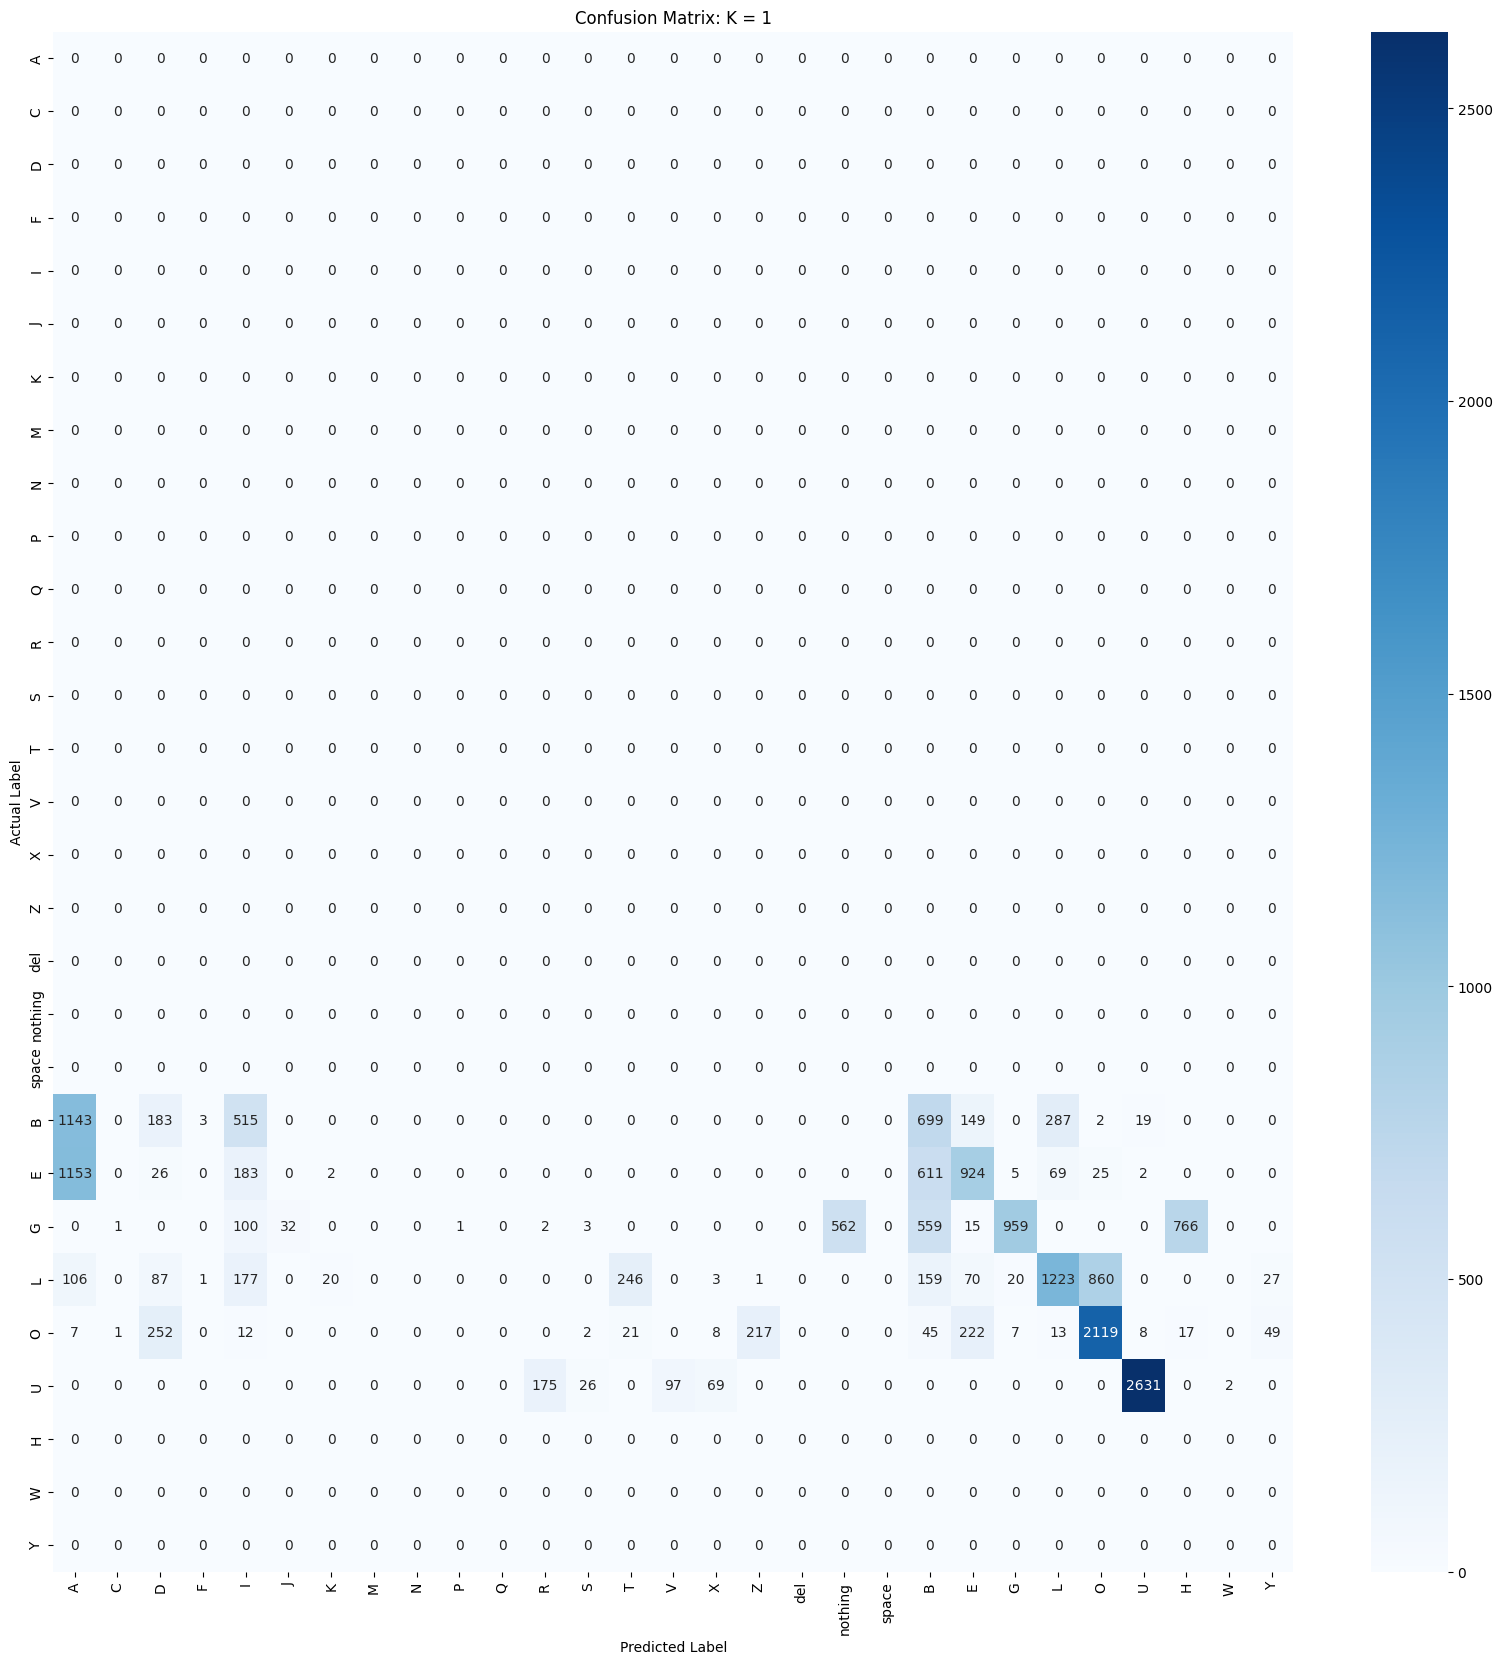

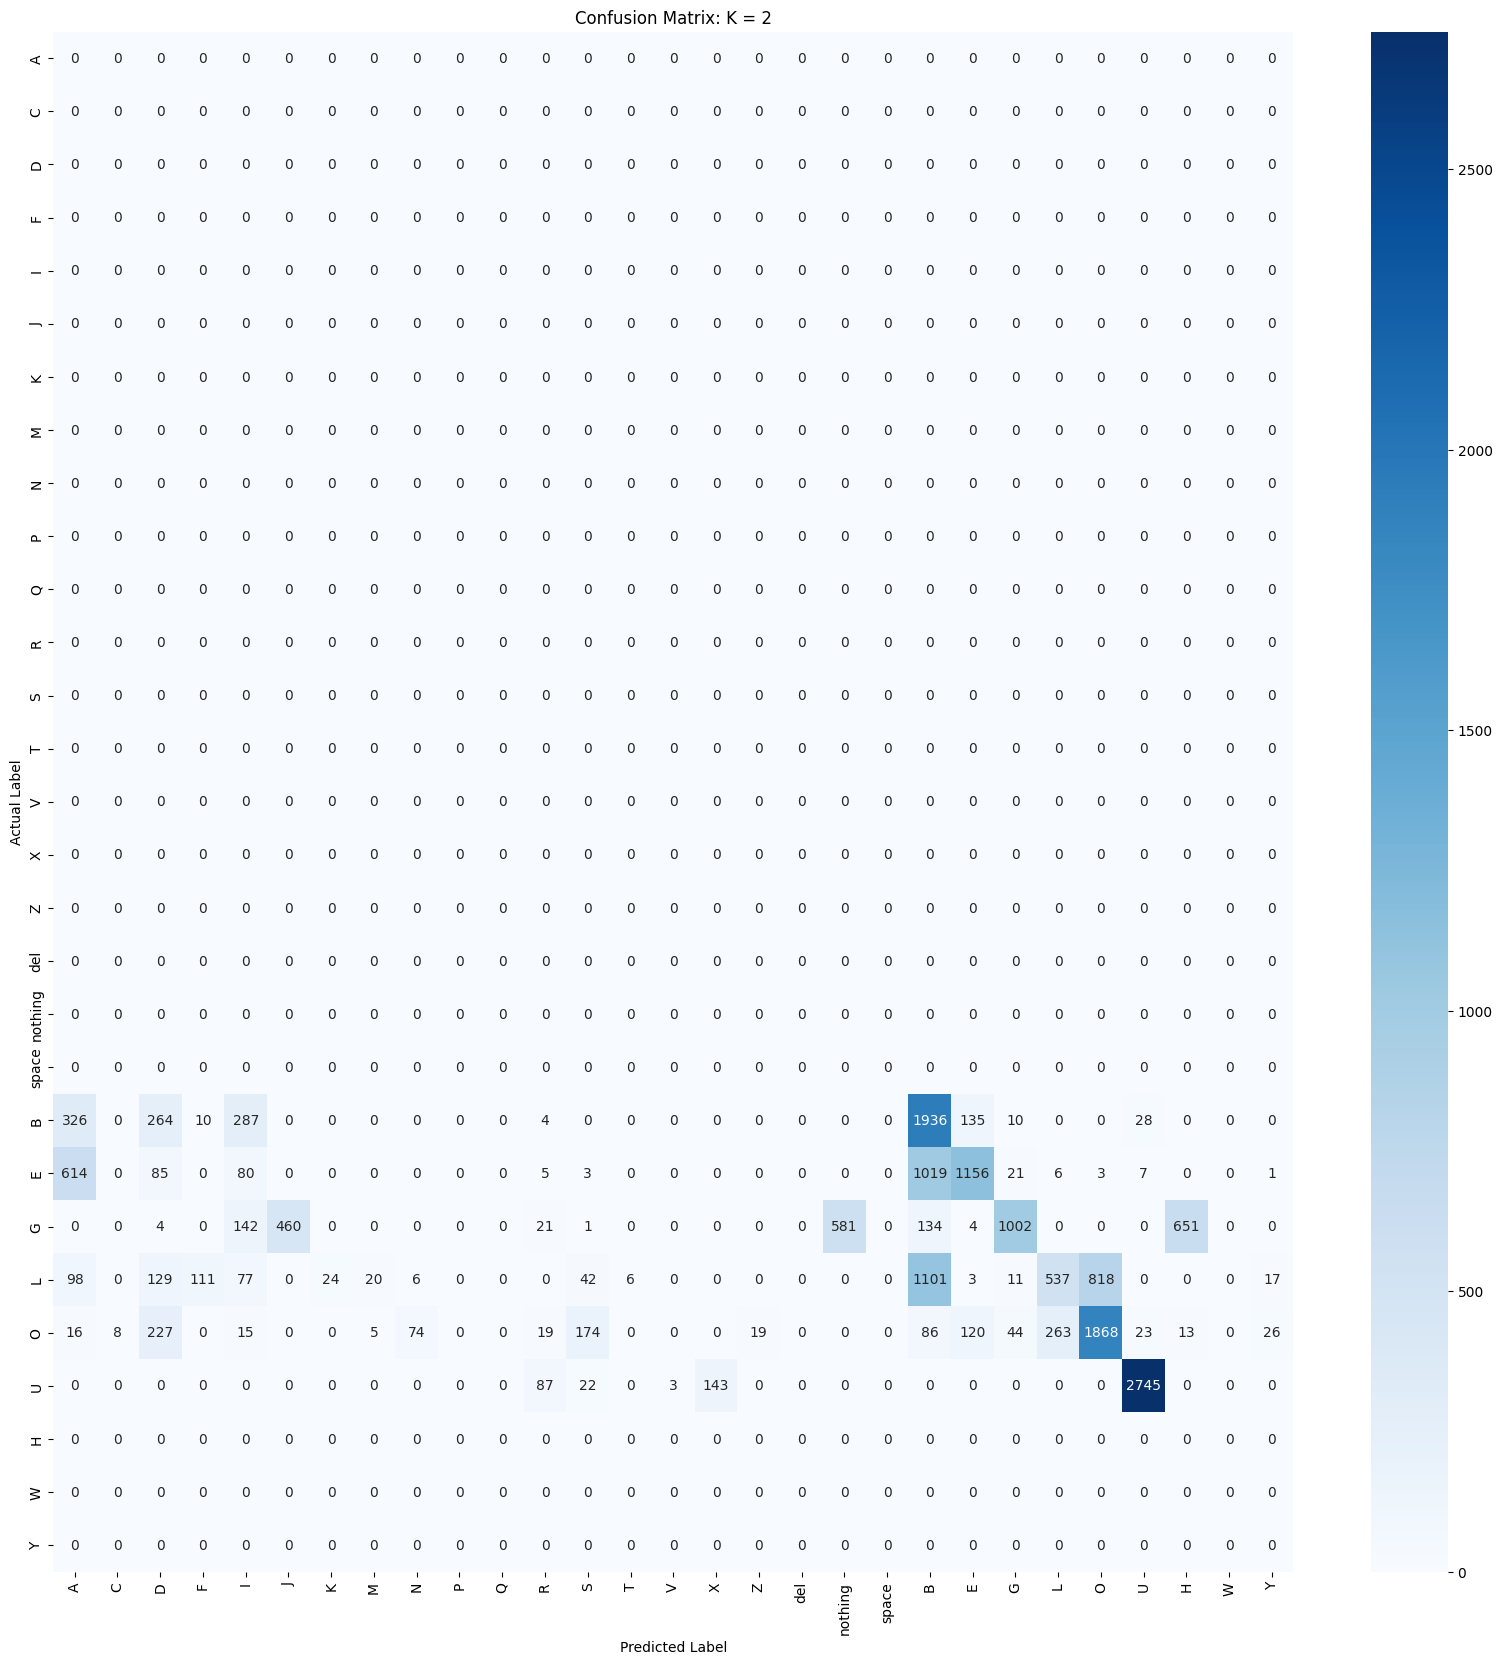

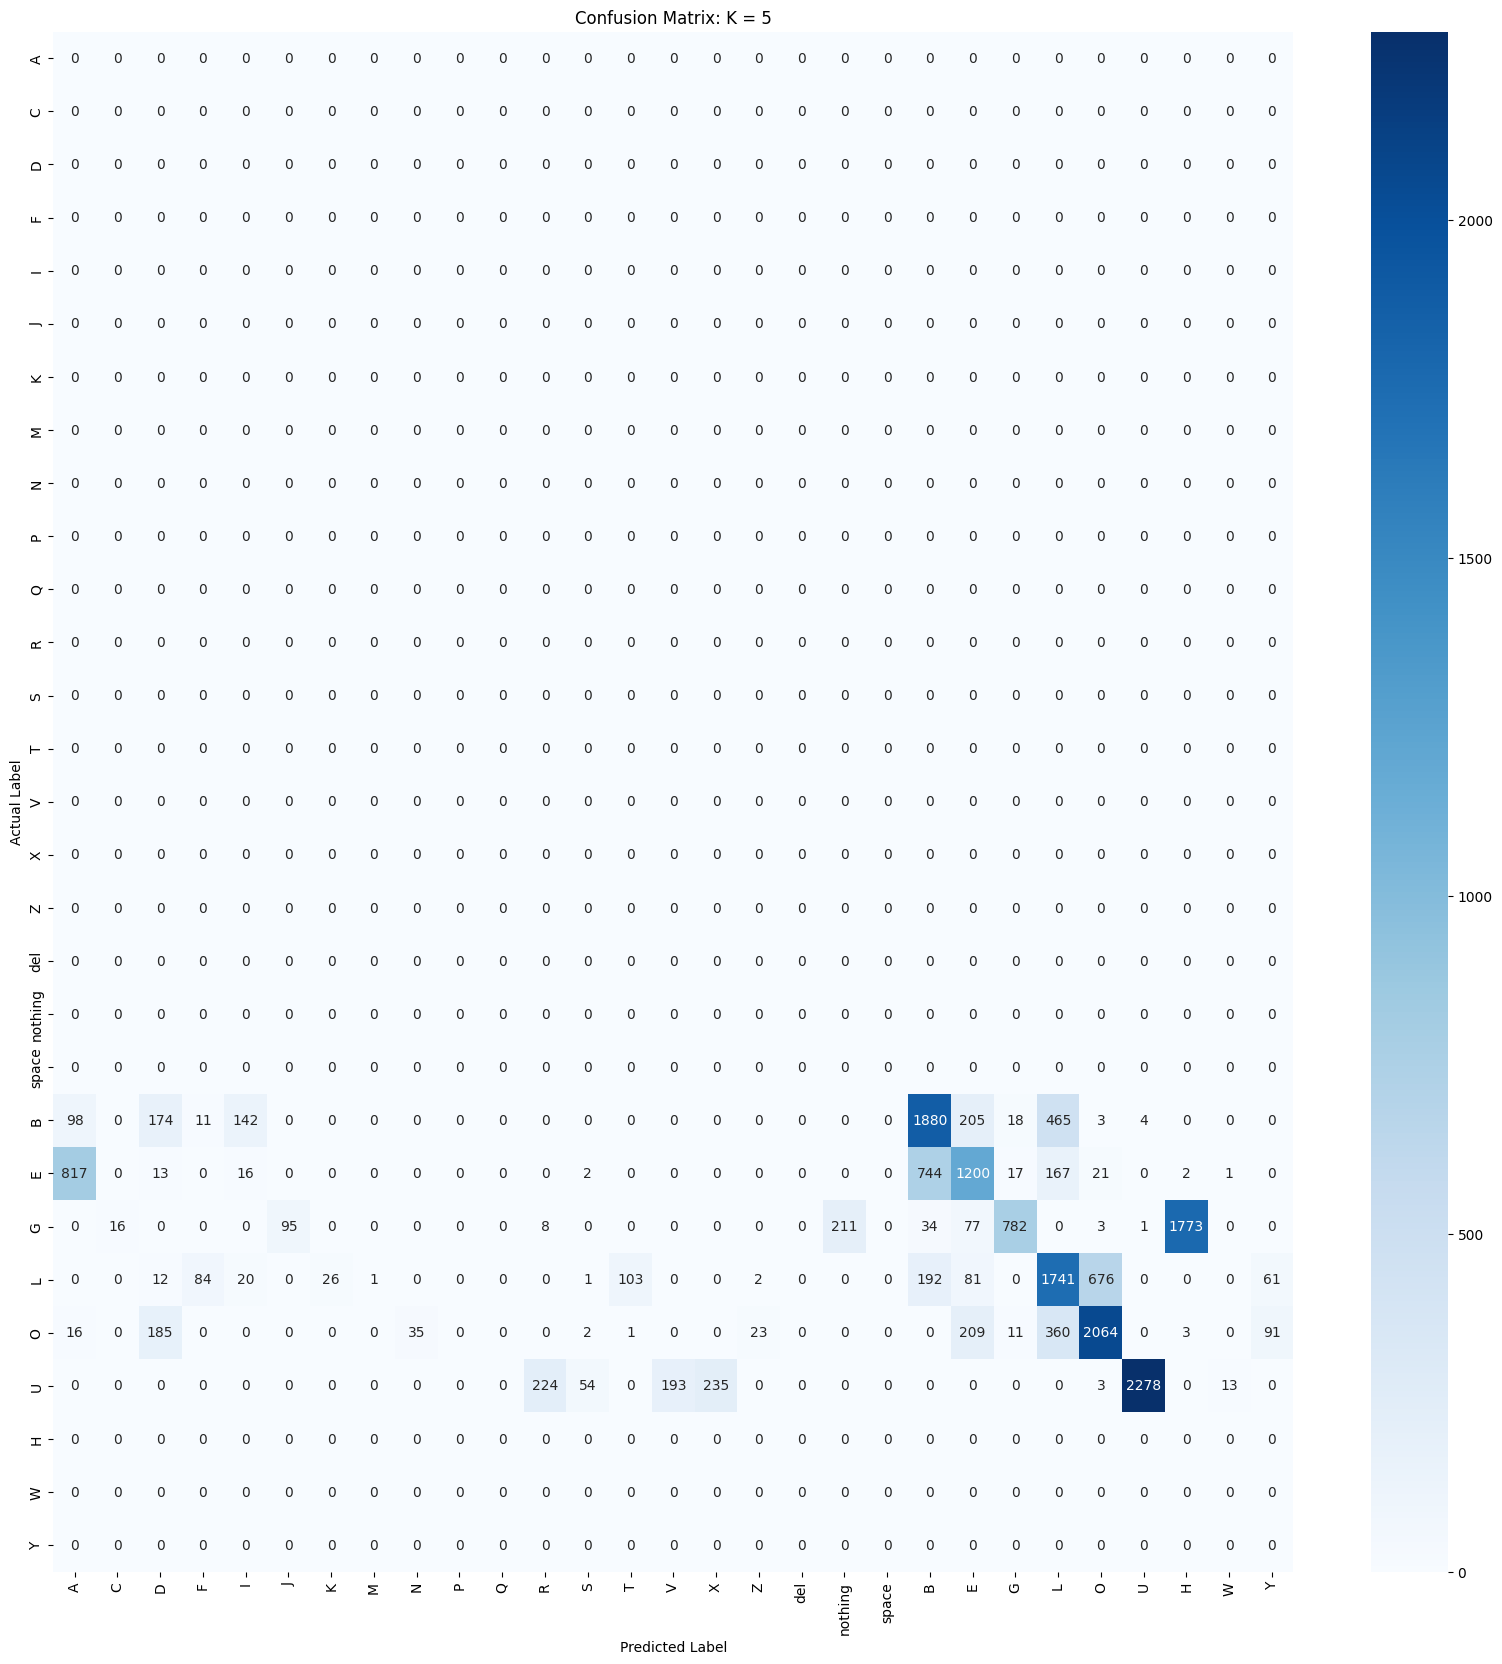

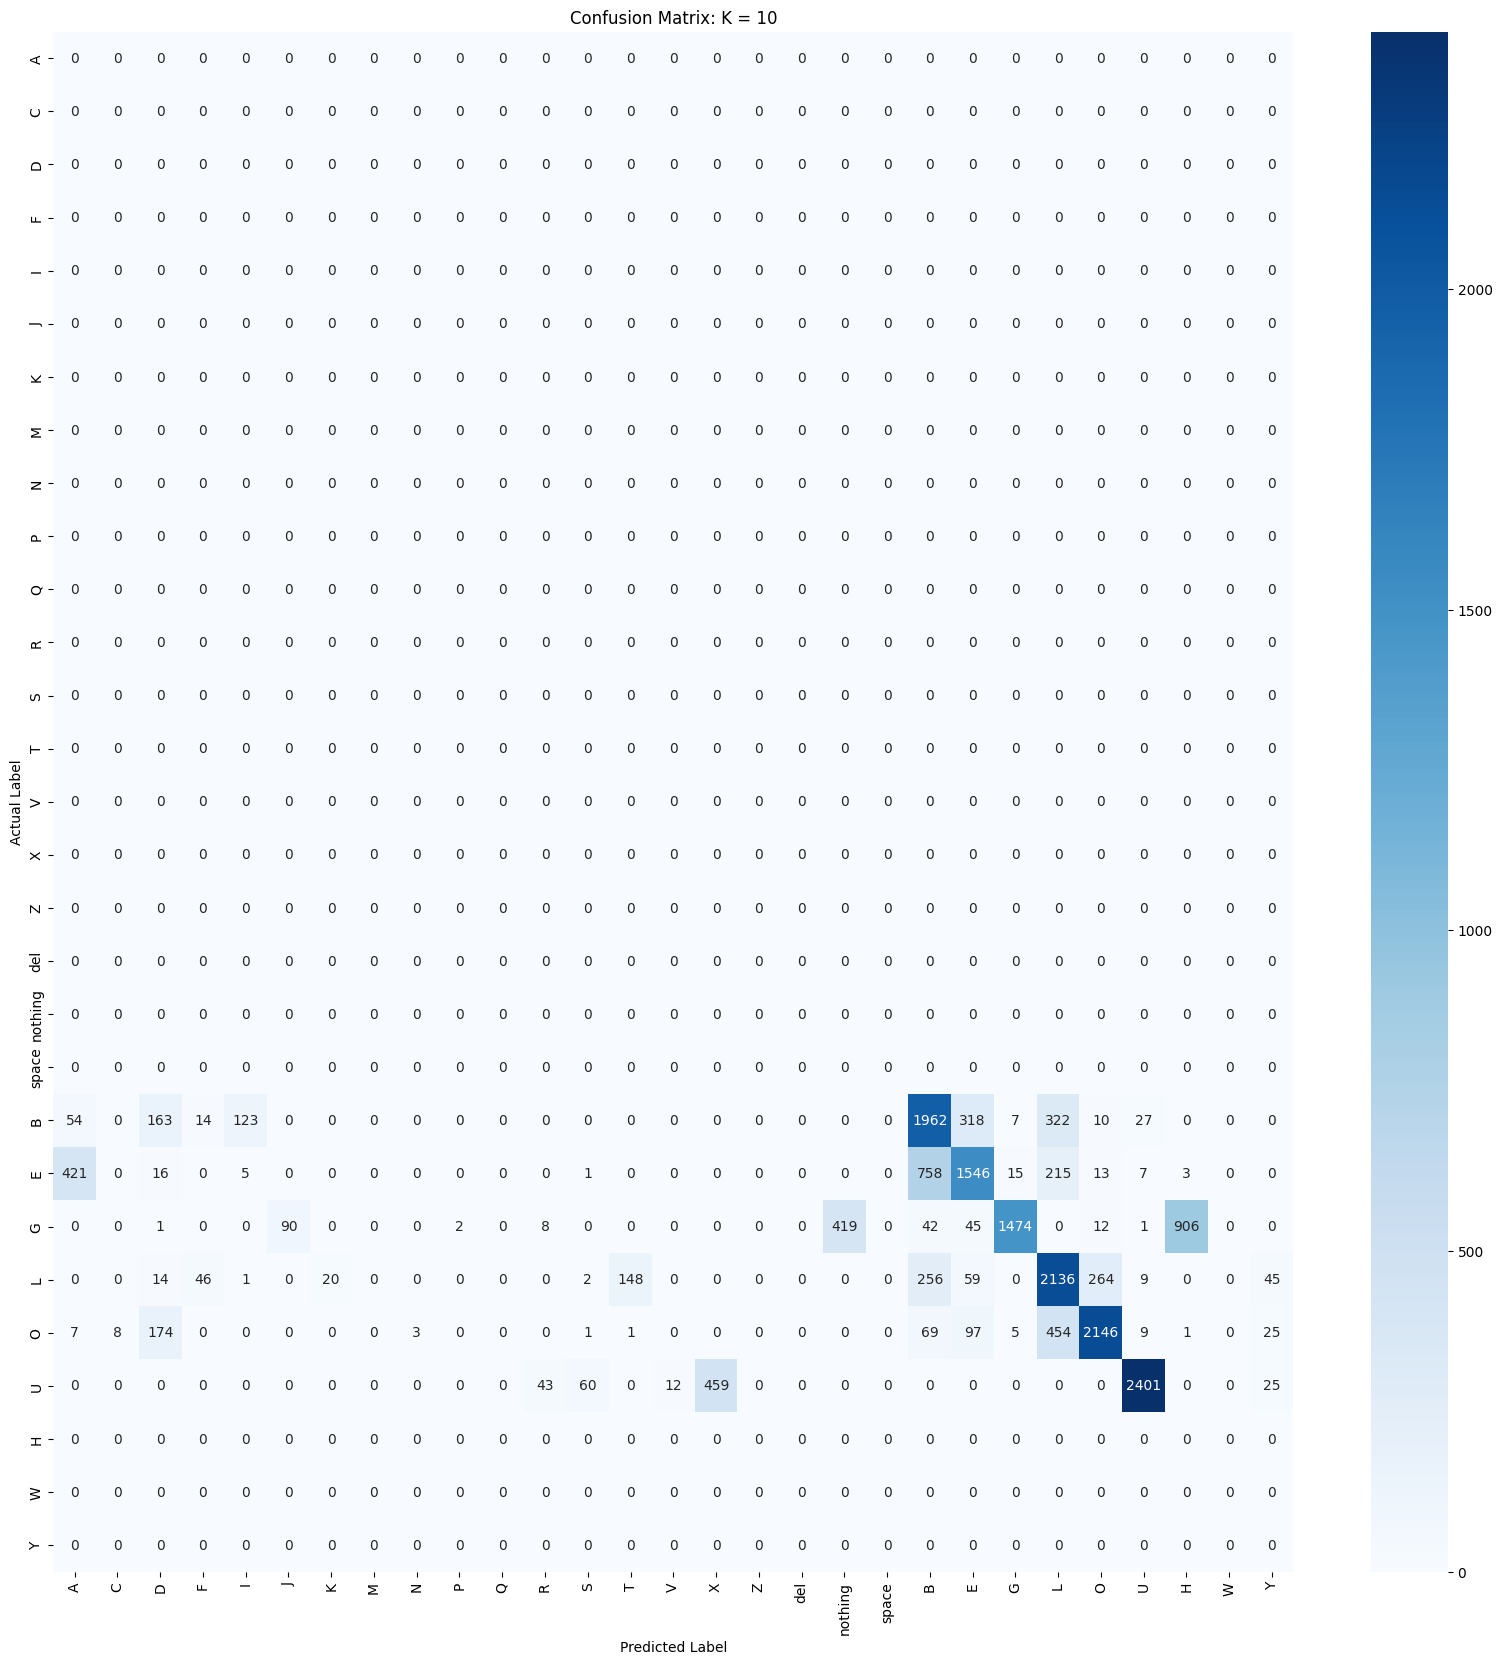

In [5]:
plot_confusion(cm1, 'K = 1', cm_labels1)
plot_confusion(cm2, 'K = 2', cm_labels2)
plot_confusion(cm5, 'K = 5', cm_labels5)
plot_confusion(cm10, 'K = 10', cm_labels10)

# Test Model 2  
Added data augmentation during training (random resized crop, horizontal flip, color jitter, gaussian blur). Horizontal flip was accidentally added and could explain worse performance.

In [6]:
# Load Model
model = get_siamese_model(1)
model_path = '../models/2'
model = load_model(model, model_path)

Weights Path: ../models/2/9.npz
Number of parameters: 329376129
<bound method Module.parameters of SiameseNetwork1(
  (cnn): Sequential(
    (layers.0): Conv2d(3, 64, kernel_size=(5,), stride=(1, 1), padding=(2, 2), bias=True)
    (layers.1): ReLU()
    (layers.2): BatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
    (layers.4): Conv2d(64, 128, kernel_size=(5,), stride=(1, 1), padding=(2, 2), bias=True)
    (layers.5): ReLU()
    (layers.6): BatchNorm(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
    (layers.8): Conv2d(128, 256, kernel_size=(3,), stride=(1, 1), padding=(1, 1), bias=True)
    (layers.9): ReLU()
    (layers.10): BatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  

In [7]:
# Test Model: 29-Ways K-Shots
acc1, inference1, cm1, cm_labels1  = eval_model_inference(model, test_loader, support_set_1, support_classes_1, margin, 1)
acc2, inference2, cm2, cm_labels2  = eval_model_inference(model, test_loader, support_set_2, support_classes_2, margin, 2)
acc5, inference5, cm5, cm_labels5  = eval_model_inference(model, test_loader, support_set_5, support_classes_5, margin, 5)
acc10, inference10, cm10, cm_labels10 = eval_model_inference(model, test_loader, support_set_10, support_classes_10, margin, 10)

Testing Model | K = 1: : 18000it [11:13, 26.71it/s, Correct=0, Inference Time=0.033542 seconds]


K = 1 | Accuracy: 16.51% | Average Inference Time: 0.035797 seconds | Average Inference Speed: 27.93 images/second


Testing Model | K = 2: : 18000it [11:10, 26.85it/s, Correct=1, Inference Time=0.032987 seconds]


K = 2 | Accuracy: 29.75% | Average Inference Time: 0.035596 seconds | Average Inference Speed: 28.09 images/second


Testing Model | K = 5: : 18000it [11:17, 26.56it/s, Correct=0, Inference Time=0.036929 seconds]


K = 5 | Accuracy: 31.31% | Average Inference Time: 0.035842 seconds | Average Inference Speed: 27.90 images/second


Testing Model | K = 10: : 18000it [11:29, 26.12it/s, Correct=0, Inference Time=0.038315 seconds]


K = 10 | Accuracy: 43.62% | Average Inference Time: 0.036733 seconds | Average Inference Speed: 27.22 images/second


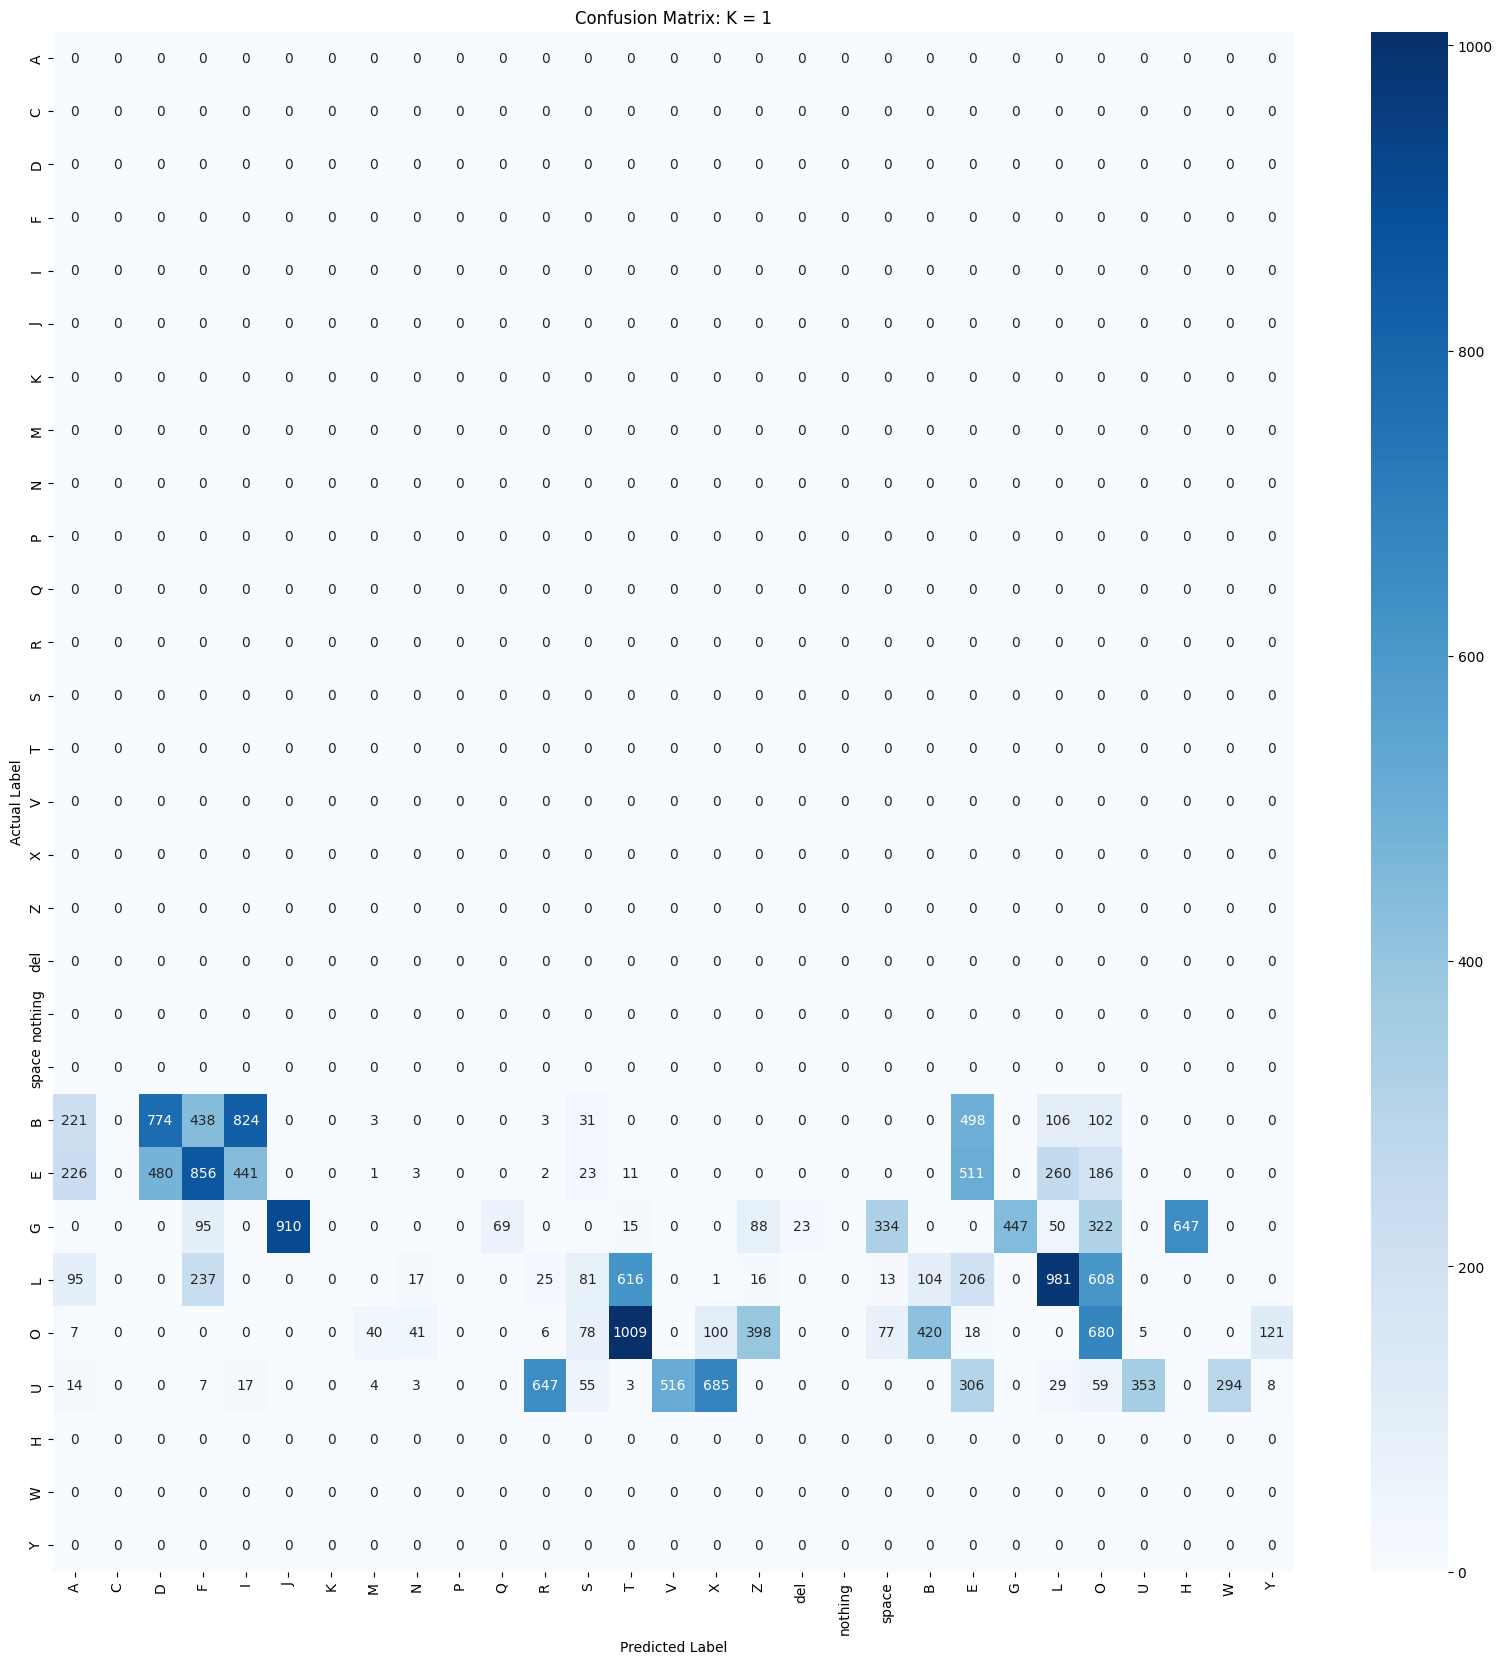

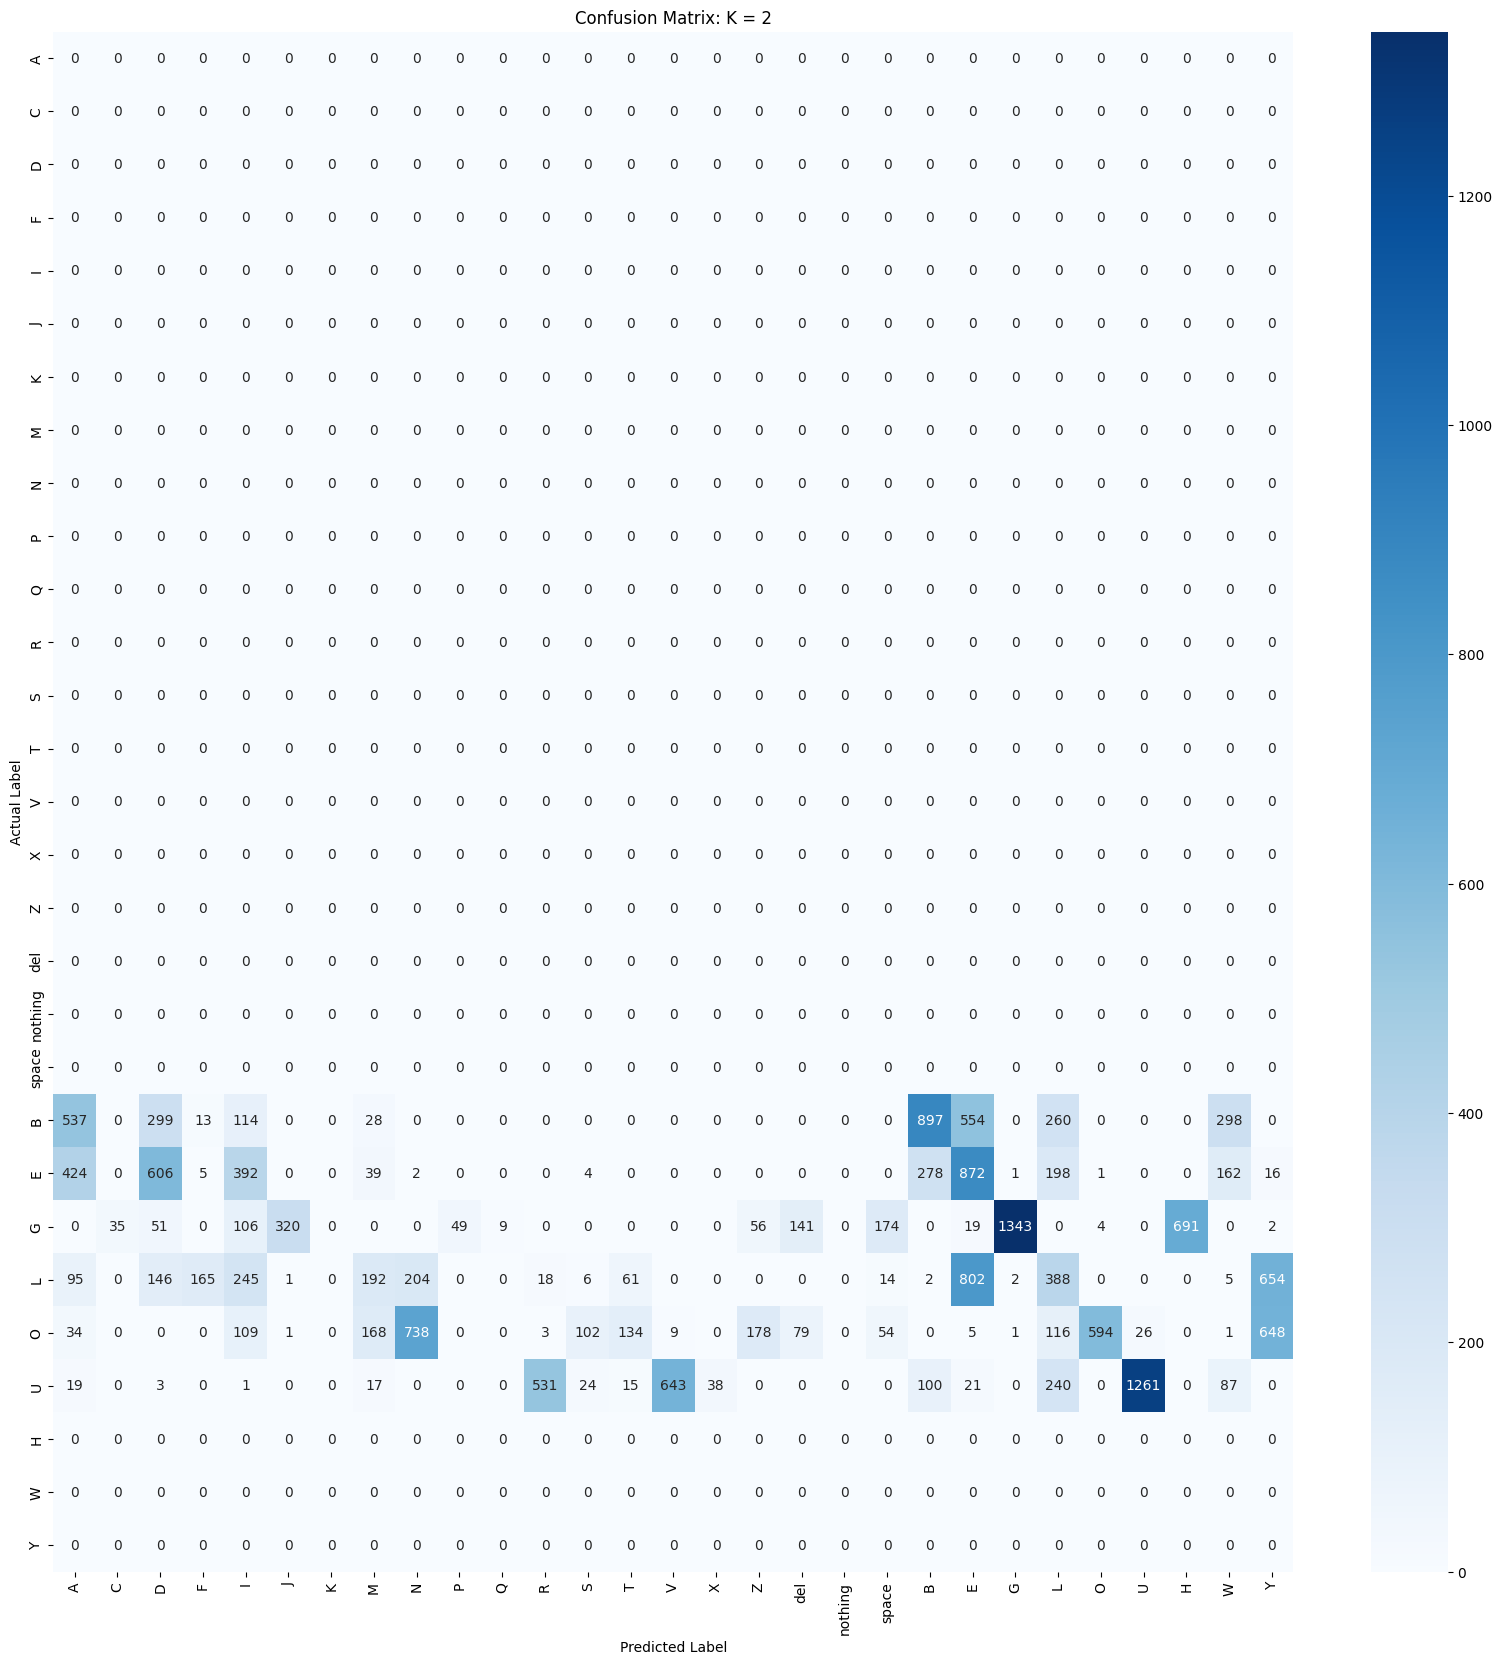

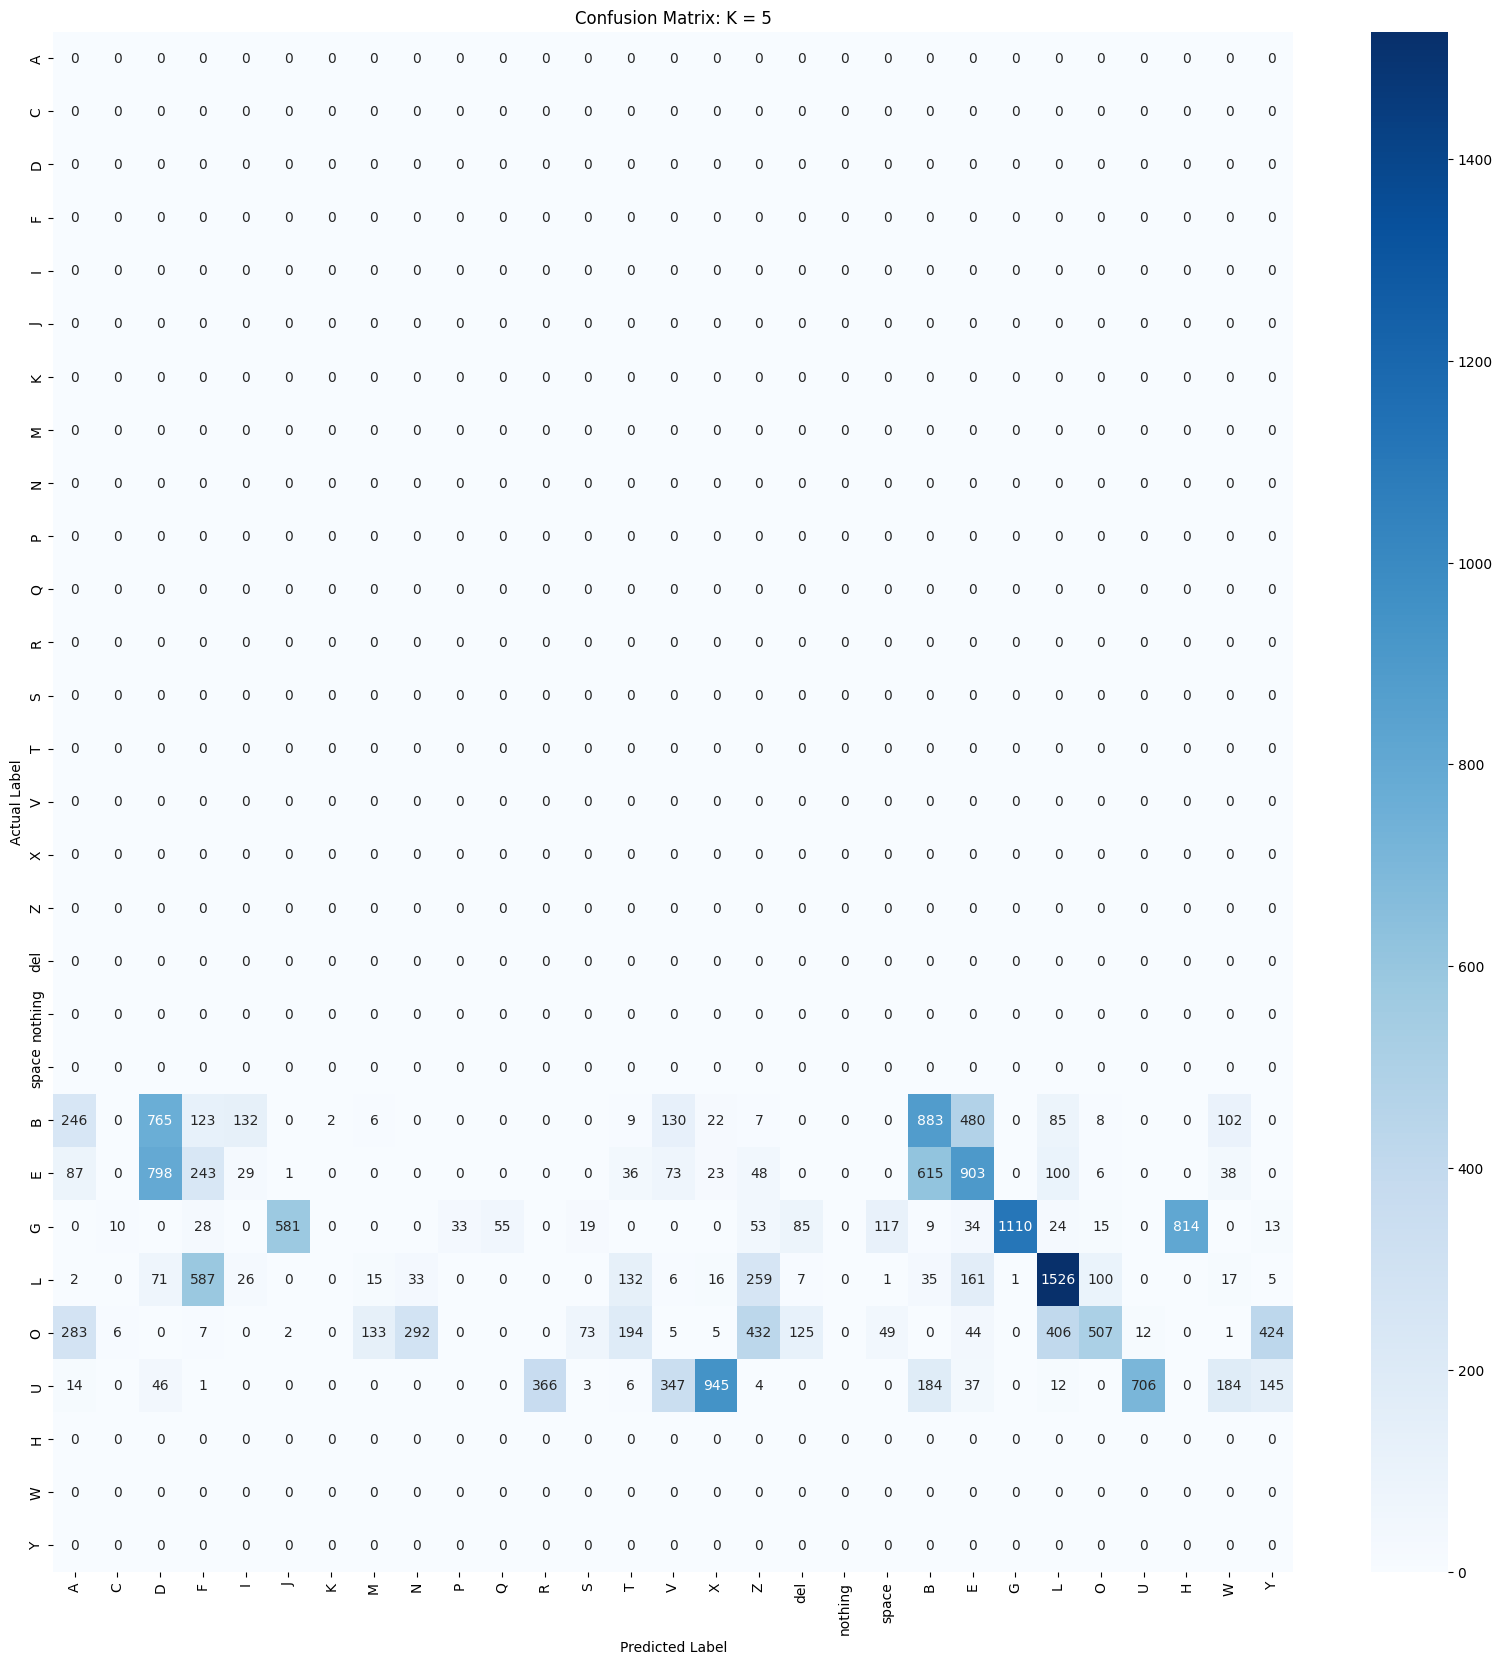

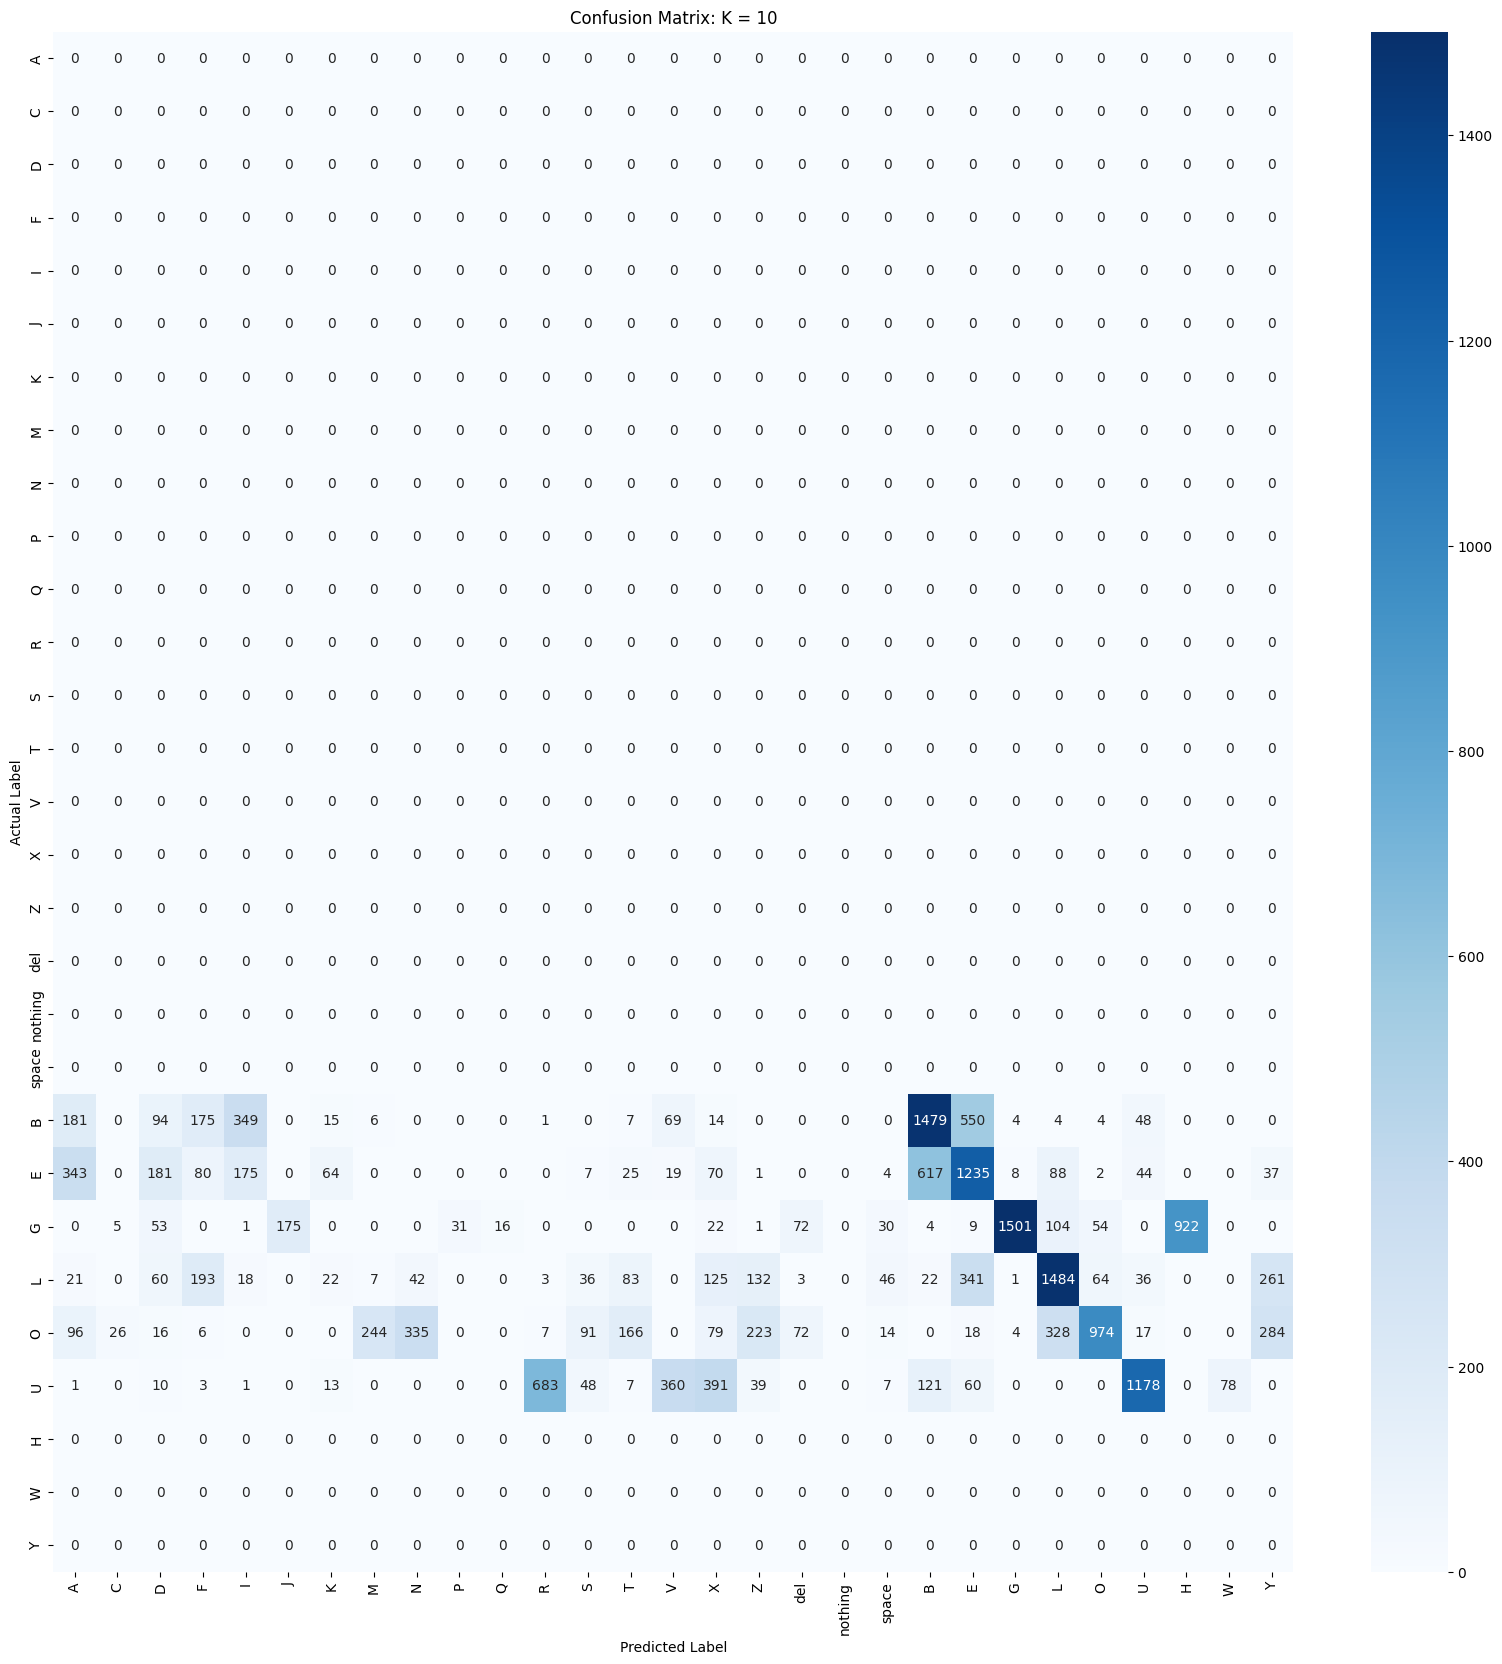

In [8]:
plot_confusion(cm1, 'K = 1', cm_labels1)
plot_confusion(cm2, 'K = 2', cm_labels2)
plot_confusion(cm5, 'K = 5', cm_labels5)
plot_confusion(cm10, 'K = 10', cm_labels10)

# Test Model 3  
Same as Model 2 but with Dropout Layers added. Horizontal Flip was still used during training unintentionally. This model was trained longer than the previous models as I added testing validation accuracy during training to help determine when to stop training.

Weights Path: ../models/3/21.npz
Number of parameters: 329376129
<bound method Module.parameters of SiameseNetwork3(
  (cnn): Sequential(
    (layers.0): Conv2d(3, 64, kernel_size=(5,), stride=(1, 1), padding=(2, 2), bias=True)
    (layers.1): ReLU()
    (layers.2): BatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
    (layers.4): Dropout(p=0.25)
    (layers.5): Conv2d(64, 128, kernel_size=(5,), stride=(1, 1), padding=(2, 2), bias=True)
    (layers.6): ReLU()
    (layers.7): BatchNorm(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
    (layers.9): Dropout(p=0.25)
    (layers.10): Conv2d(128, 256, kernel_size=(3,), stride=(1, 1), padding=(1, 1), bias=True)
    (layers.11): ReLU()
    (layers.12): BatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers.1

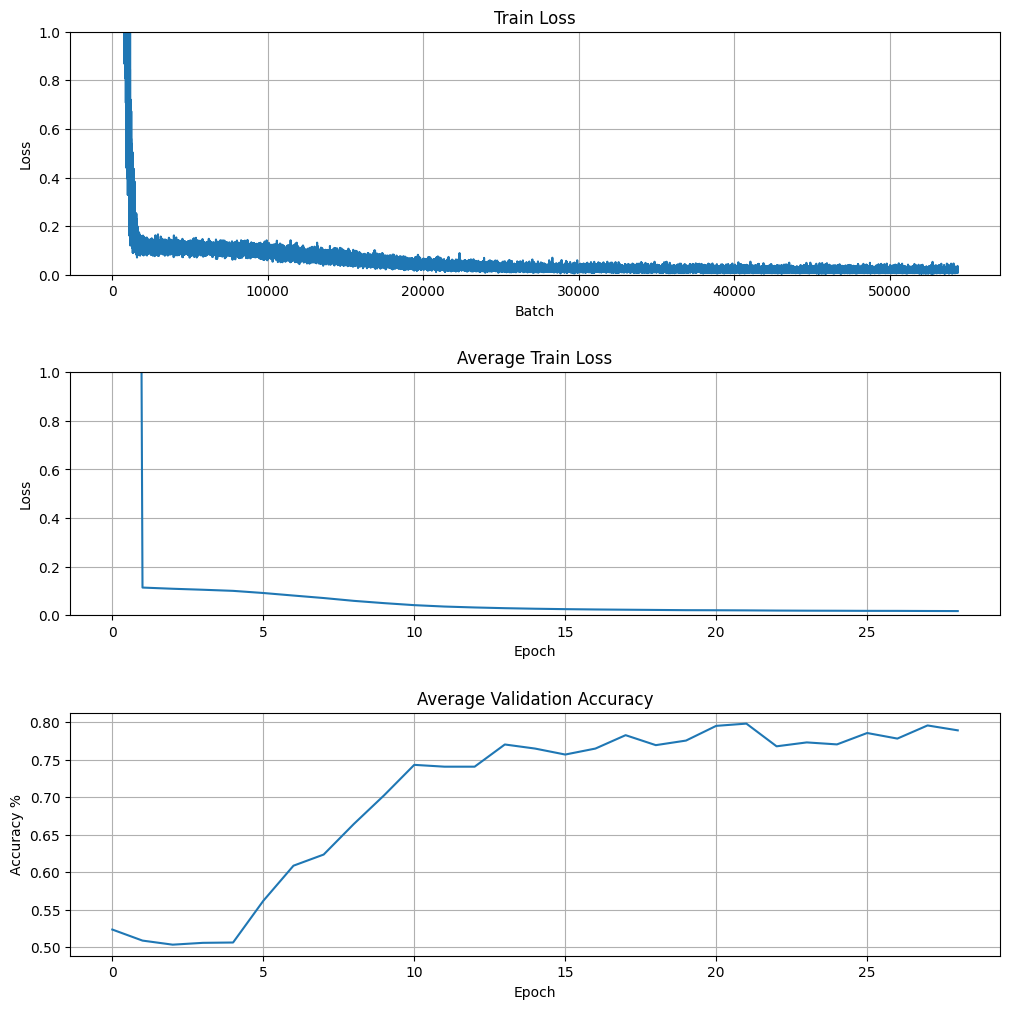

In [9]:
# Load Model
model = get_siamese_model(3)
model_path = '../models/3'
model = load_model(model, model_path)

In [10]:
# Test Model: 29-Ways K-Shots
acc1, inference1, cm1, cm_labels1  = eval_model_inference(model, test_loader, support_set_1, support_classes_1, margin, 1)
acc2, inference2, cm2, cm_labels2  = eval_model_inference(model, test_loader, support_set_2, support_classes_2, margin, 2)
acc5, inference5, cm5, cm_labels5  = eval_model_inference(model, test_loader, support_set_5, support_classes_5, margin, 5)
acc10, inference10, cm10, cm_labels10 = eval_model_inference(model, test_loader, support_set_10, support_classes_10, margin, 10)

Testing Model | K = 1: : 18000it [11:19, 26.48it/s, Correct=0, Inference Time=0.034230 seconds]


K = 1 | Accuracy: 24.62% | Average Inference Time: 0.036065 seconds | Average Inference Speed: 27.73 images/second


Testing Model | K = 2: : 18000it [11:09, 26.89it/s, Correct=1, Inference Time=0.035648 seconds]


K = 2 | Accuracy: 44.73% | Average Inference Time: 0.035539 seconds | Average Inference Speed: 28.14 images/second


Testing Model | K = 5: : 18000it [11:19, 26.49it/s, Correct=1, Inference Time=0.036574 seconds]


K = 5 | Accuracy: 52.94% | Average Inference Time: 0.036105 seconds | Average Inference Speed: 27.70 images/second


Testing Model | K = 10: : 18000it [11:08, 26.91it/s, Correct=1, Inference Time=0.037576 seconds]


K = 10 | Accuracy: 67.60% | Average Inference Time: 0.035406 seconds | Average Inference Speed: 28.24 images/second


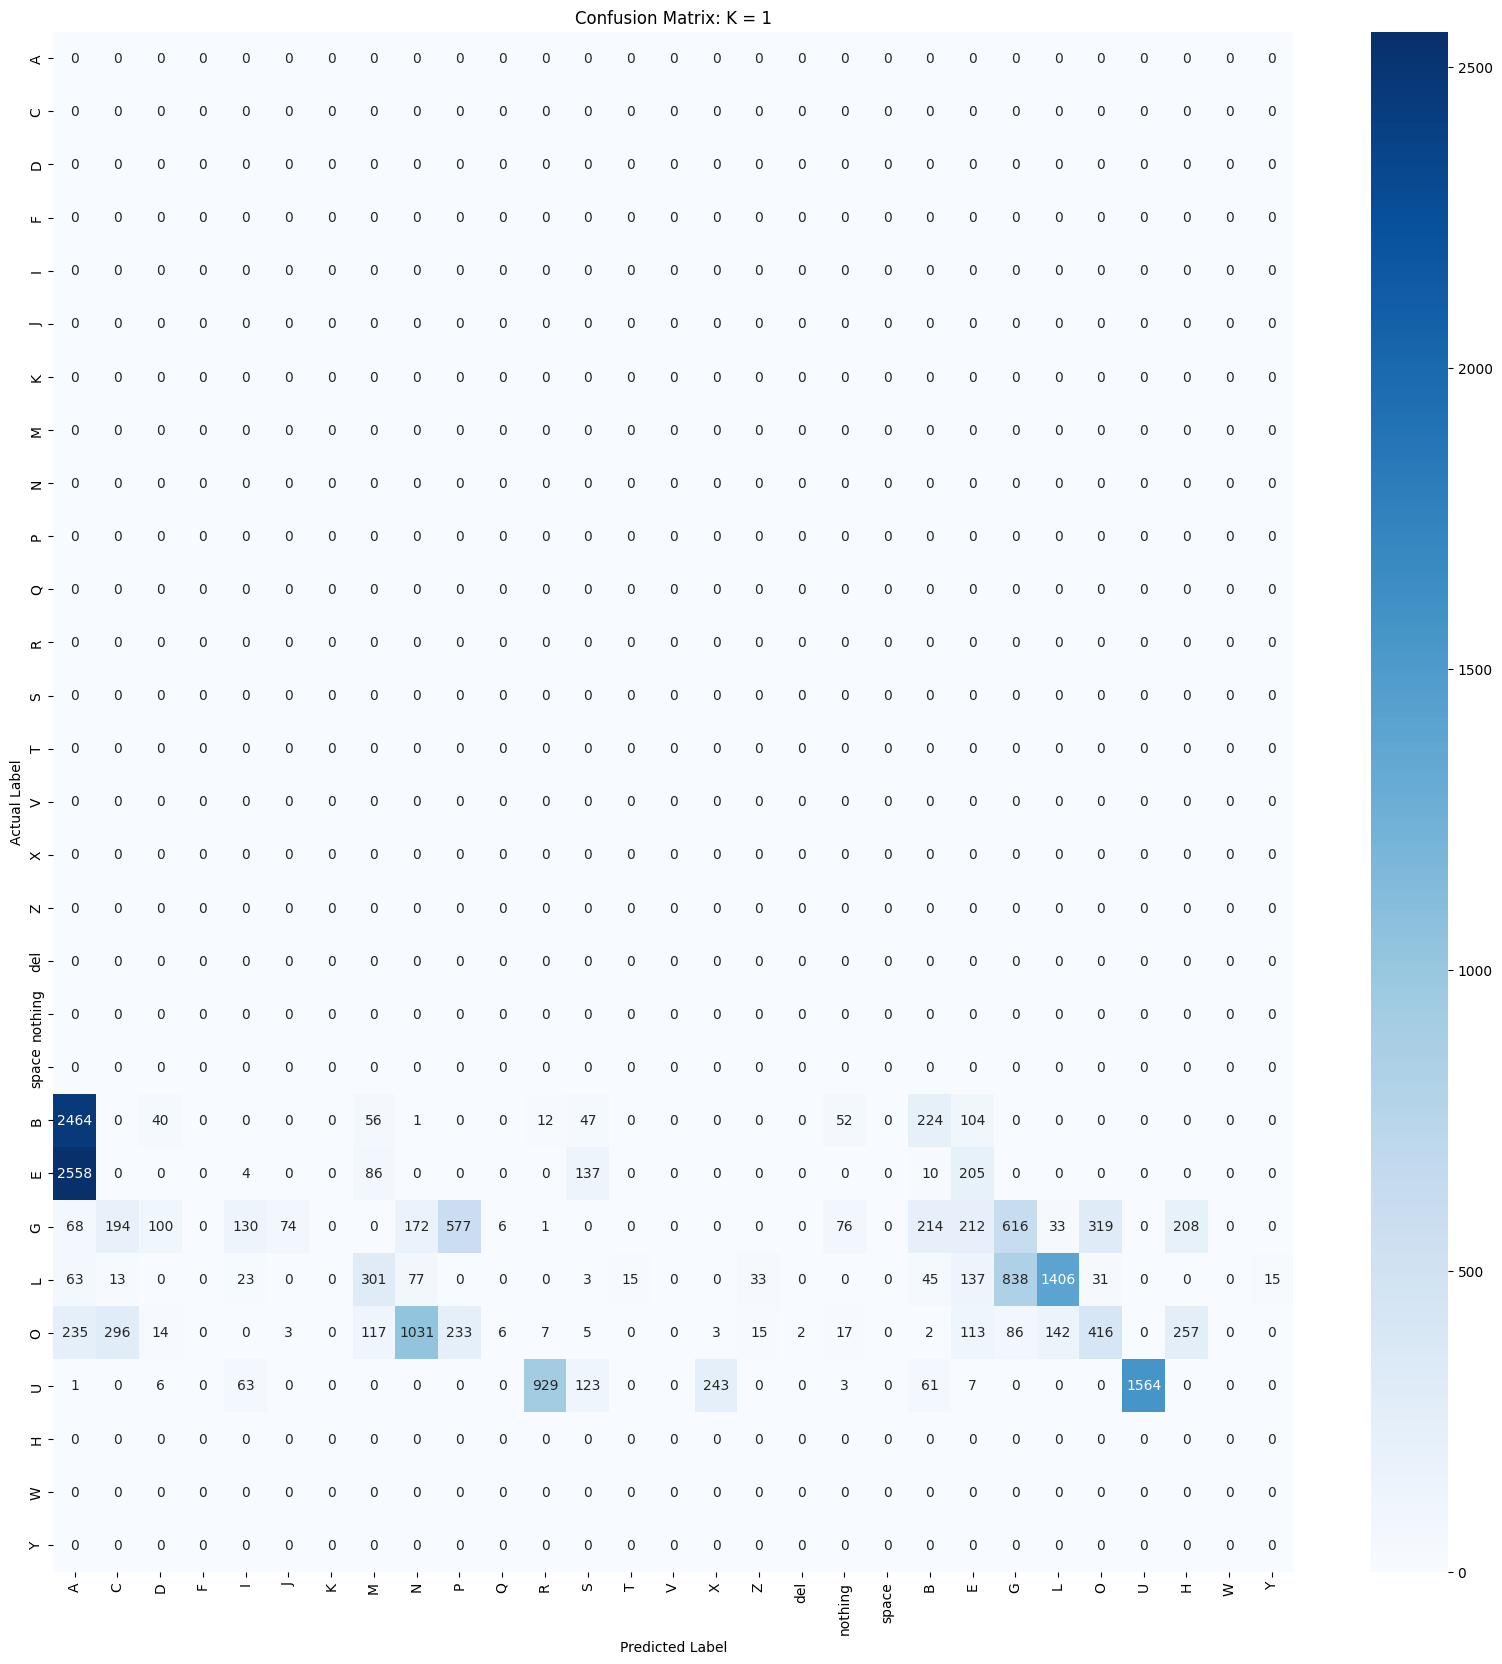

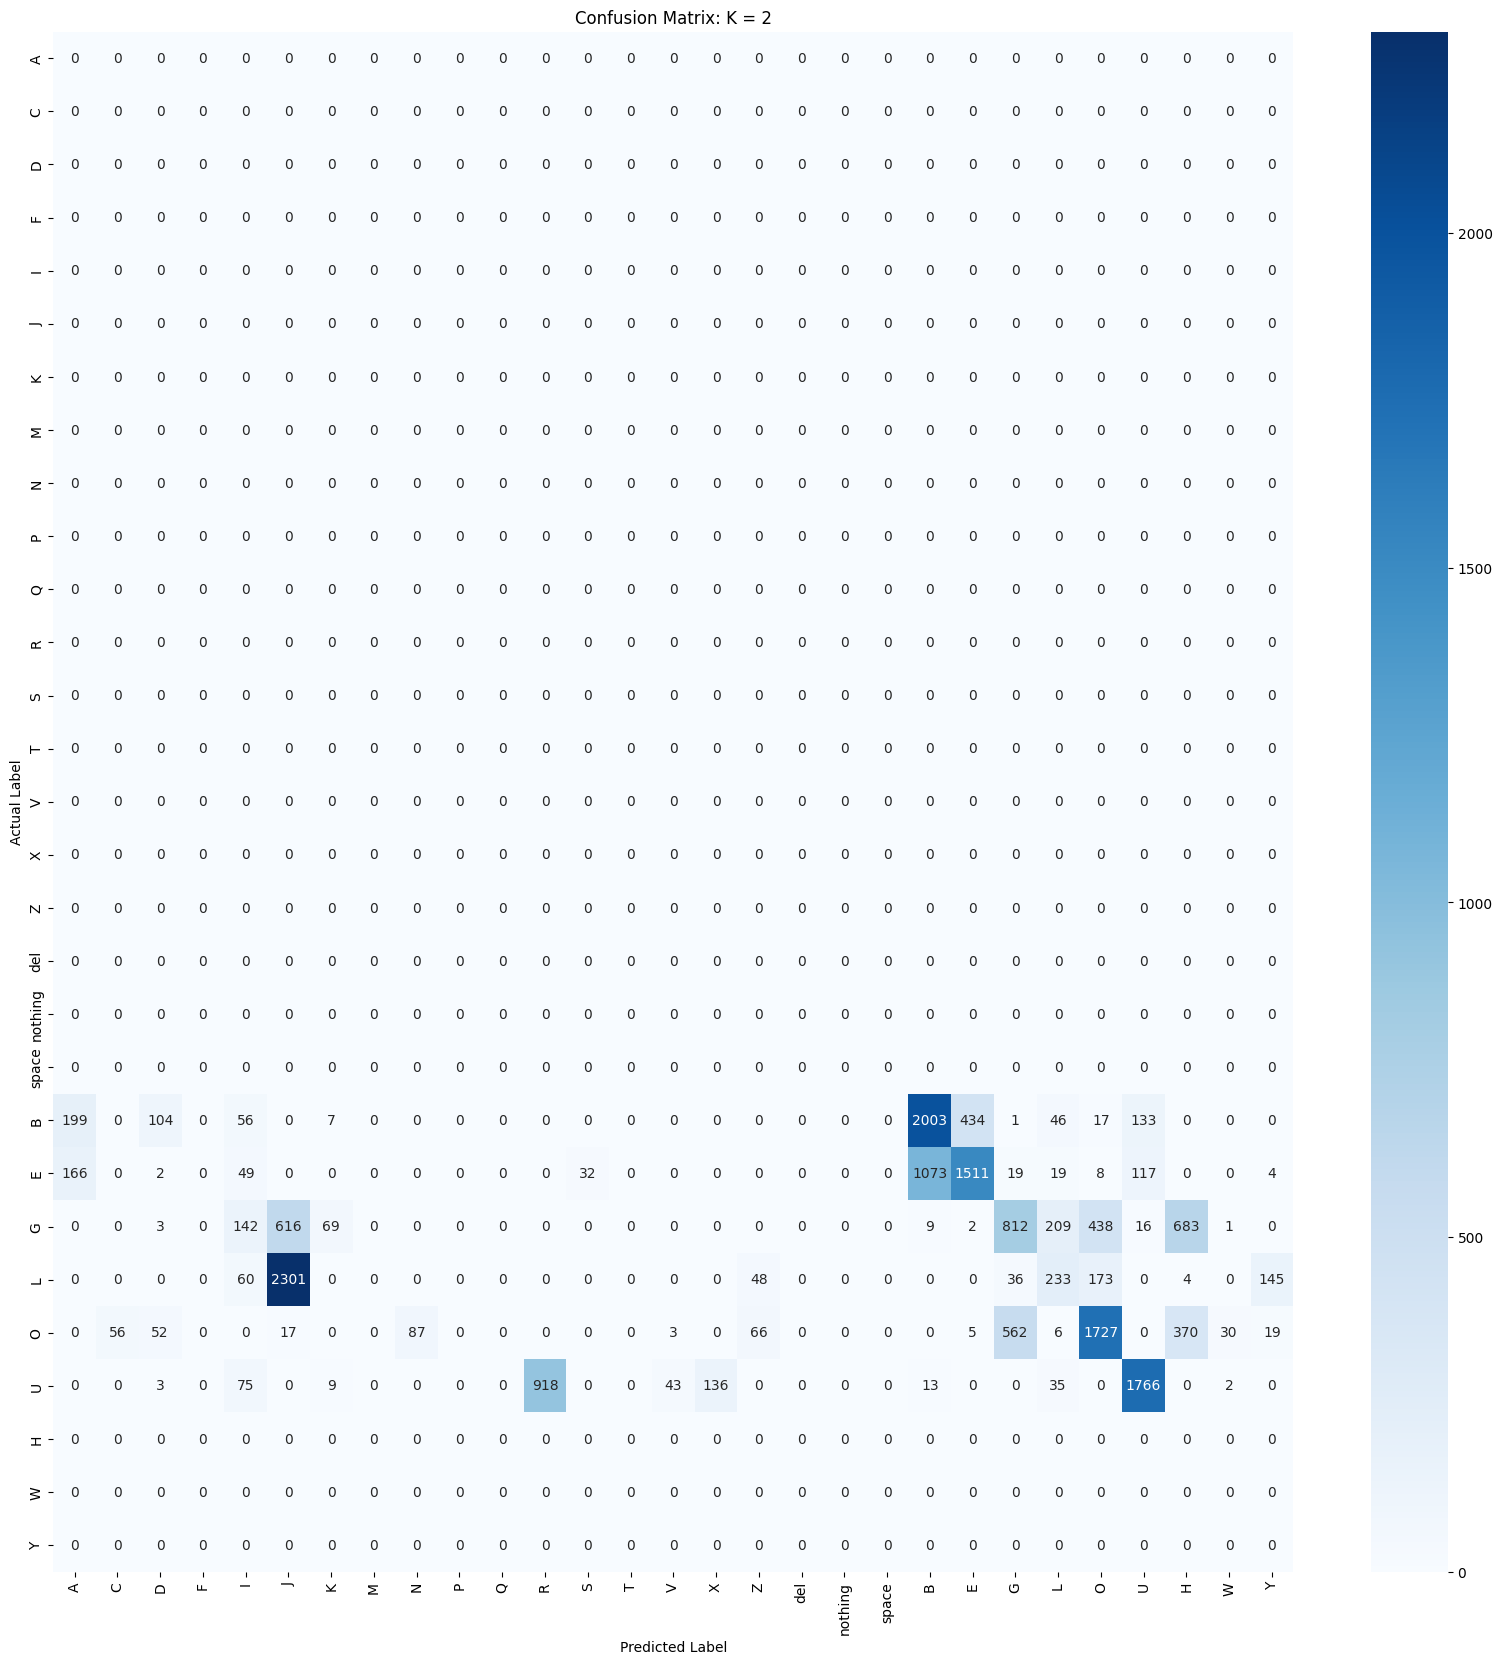

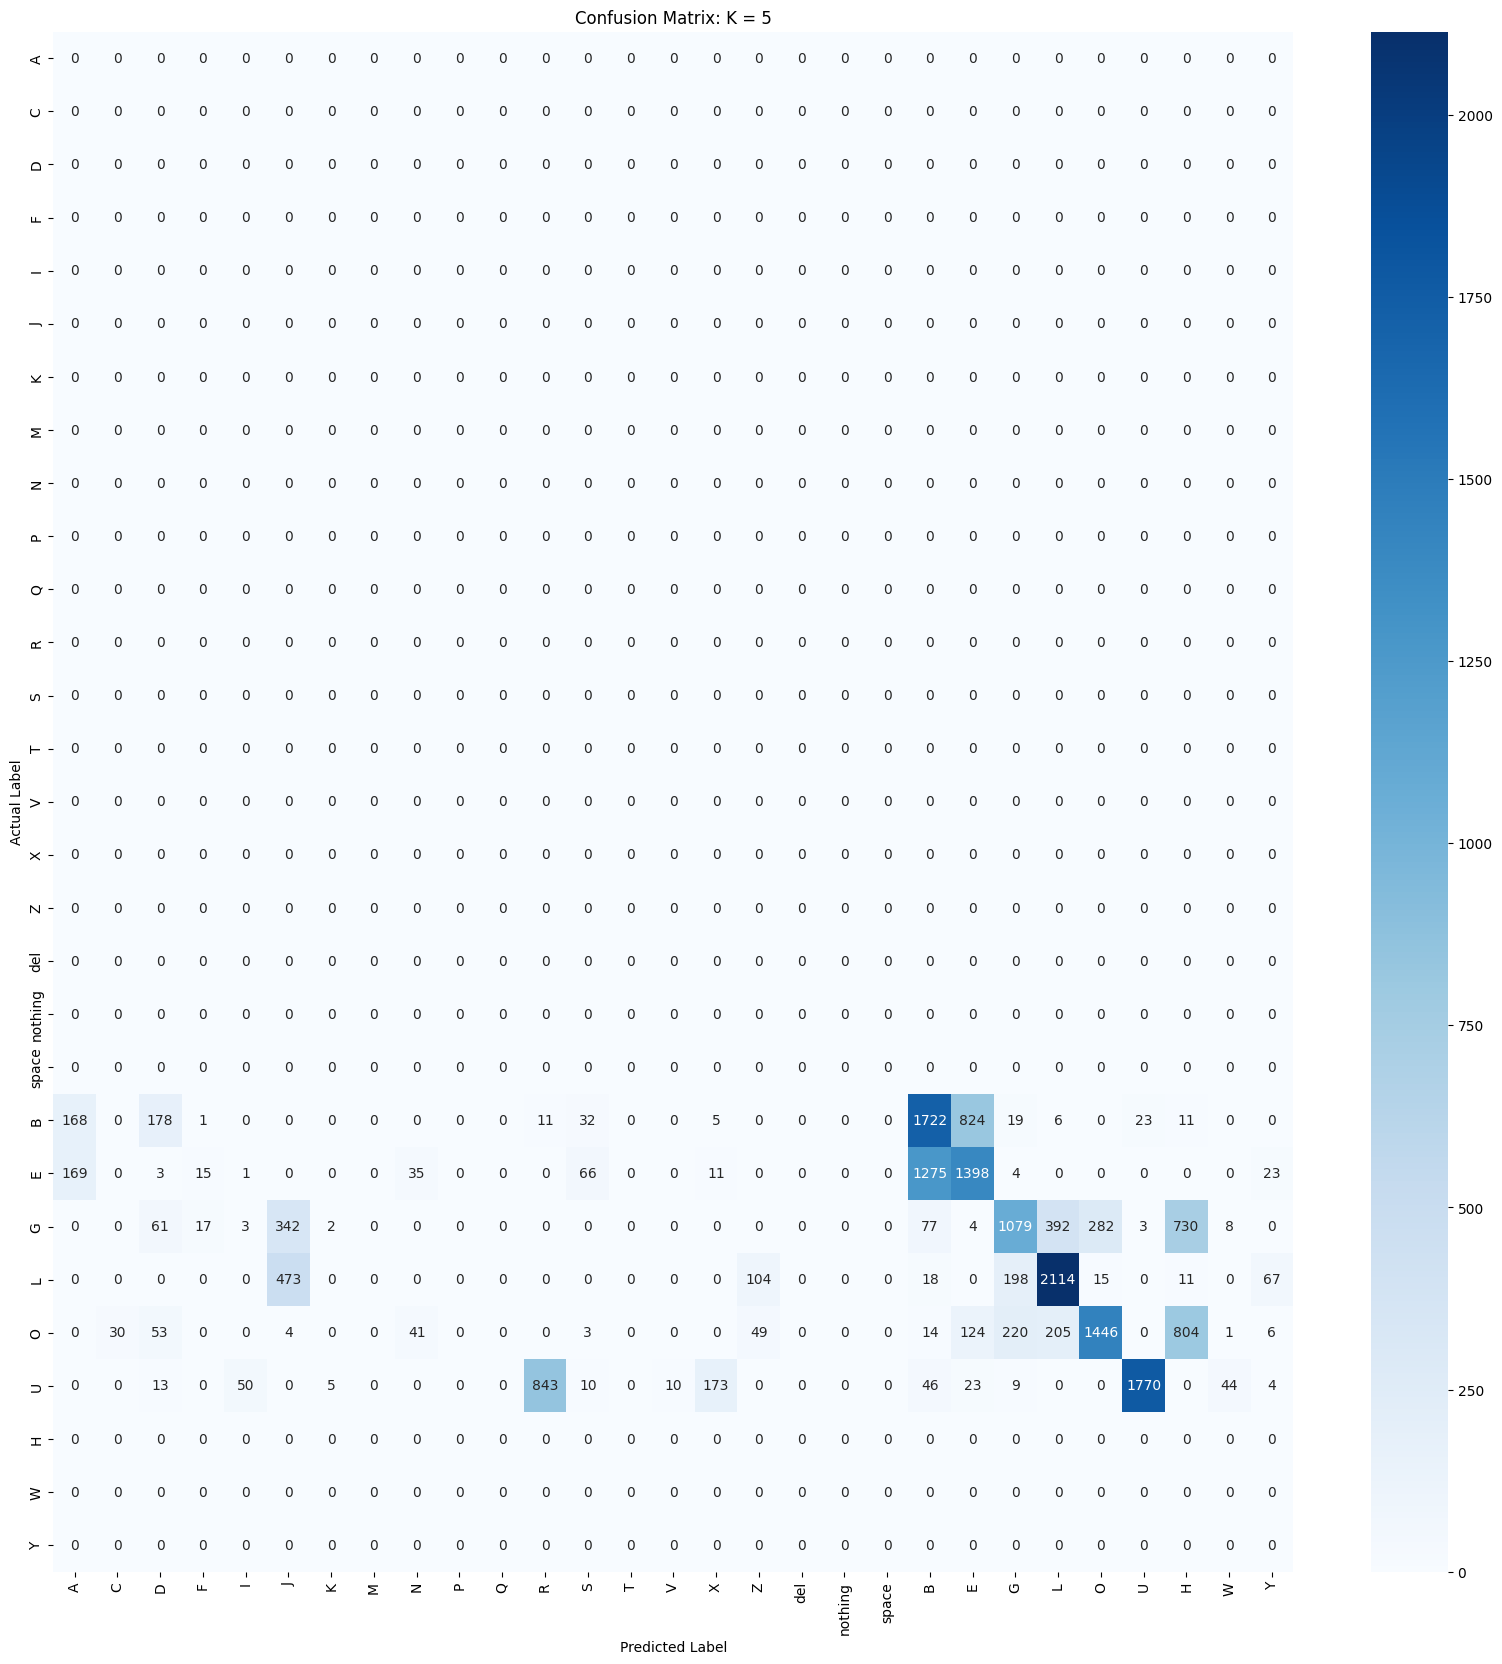

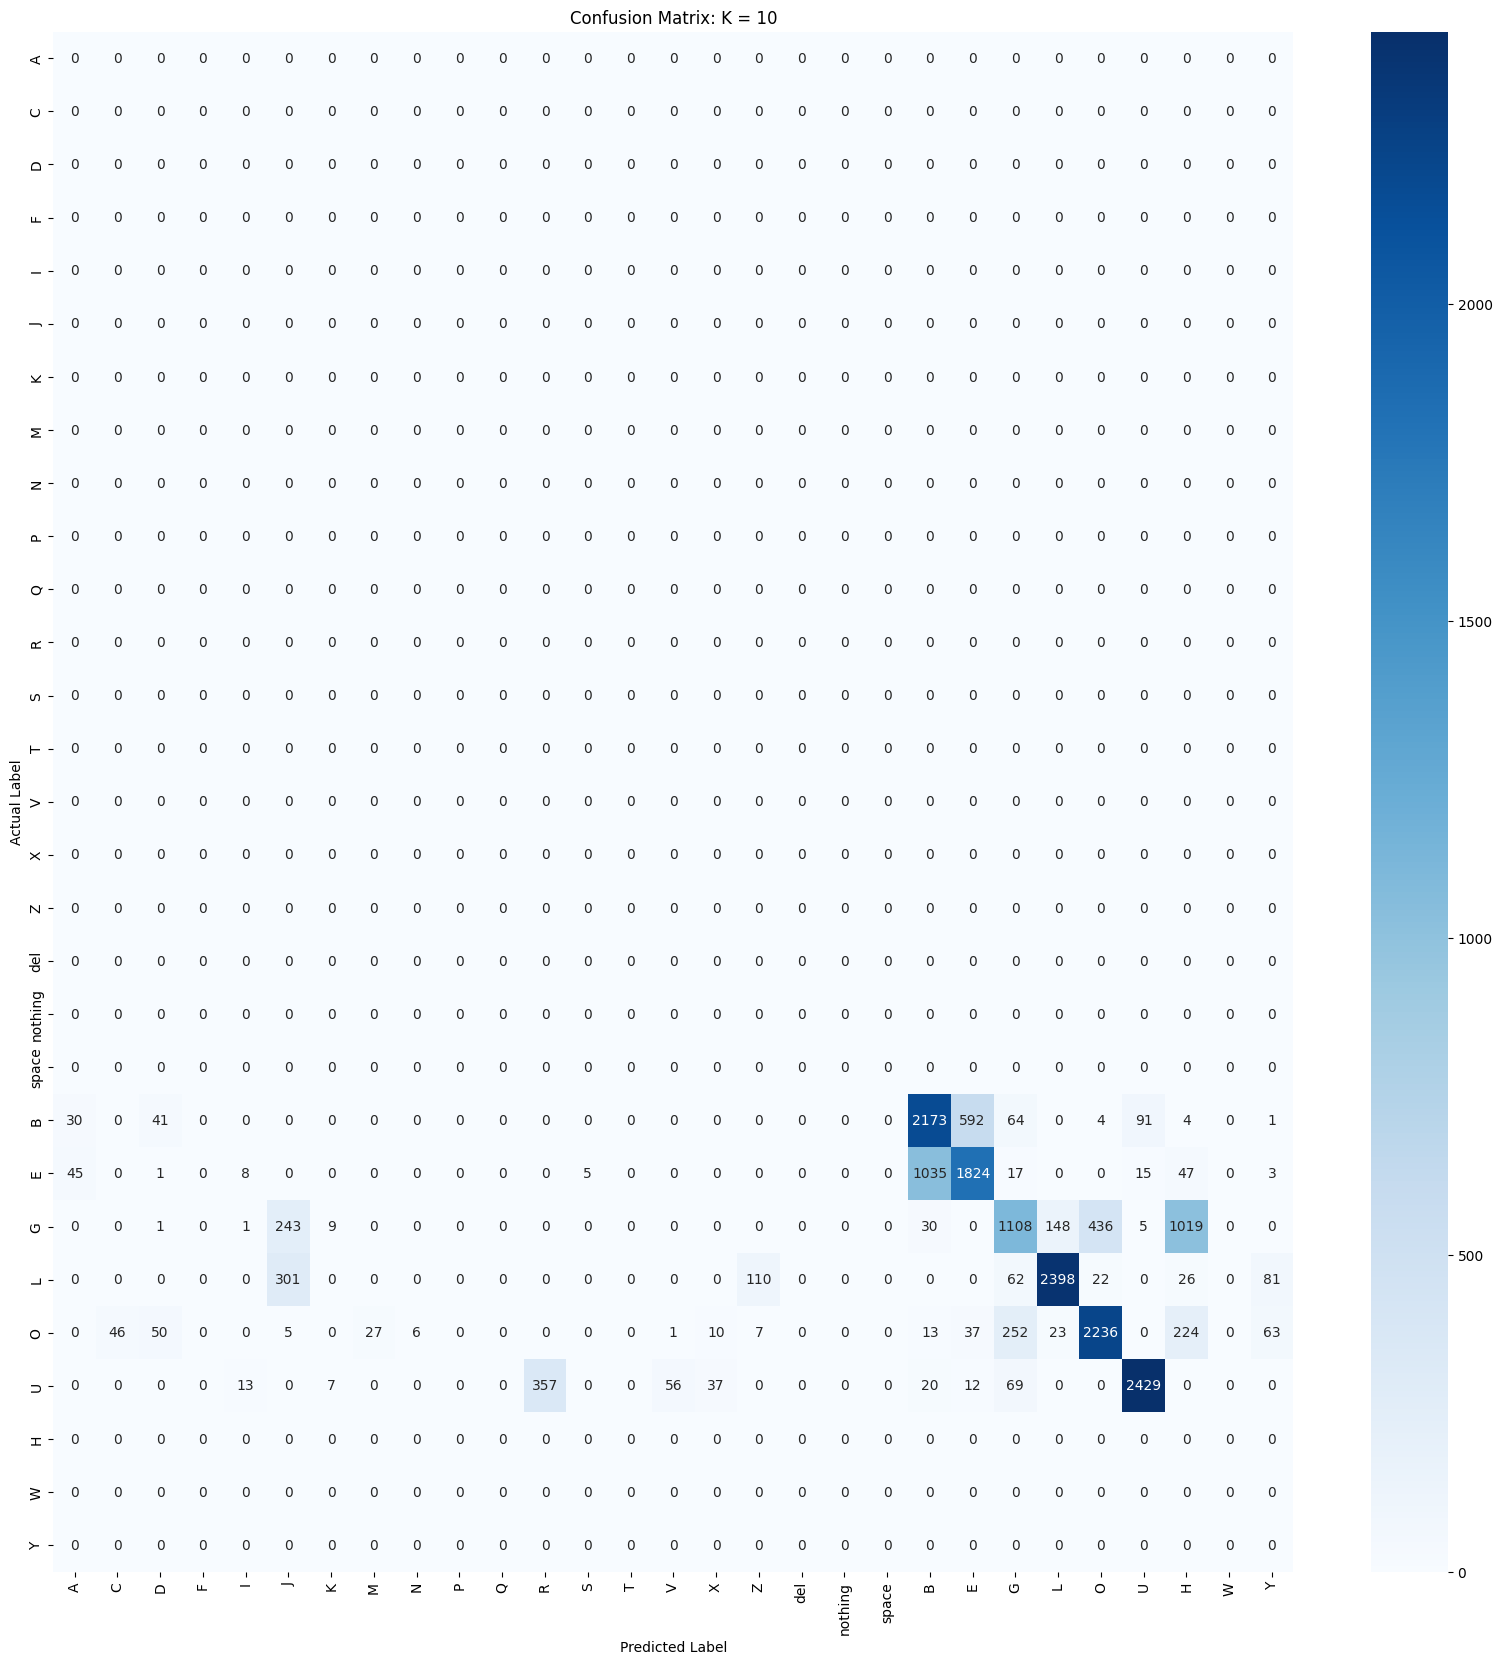

In [11]:
plot_confusion(cm1, 'K = 1', cm_labels1)
plot_confusion(cm2, 'K = 2', cm_labels2)
plot_confusion(cm5, 'K = 5', cm_labels5)
plot_confusion(cm10, 'K = 10', cm_labels10)